In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from get_win_streak import get_win_streak


df = pd.read_csv("clean.csv")

In [2]:
df['win_count'] = df.groupby('champion_name').cumcount() + 1

In [12]:
df.sample()

,season,round,url,raceName,Circuit,date,champion_name,time,win_count,win_streak
585,1996,5,http://en.wikipedia.org/wiki/1996_San_Marino_G...,San Marino Grand Prix,"{'circuitId': 'imola', 'url': 'http://en.wikip...",1996-05-05,Damon Hill,NaN,17,1


Text(0.5, 1.0, 'Biggest champions')

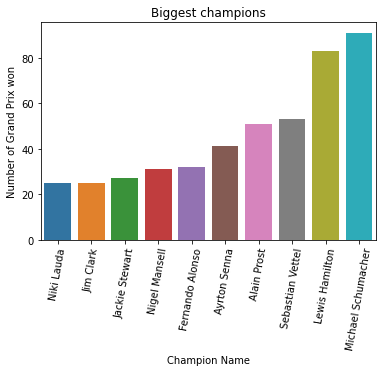

In [11]:
counts = df['champion_name'].value_counts()
top_10 = counts.head(10)
top_10 = top_10.sort_values()
df_top_10 = df[df['champion_name'].isin(top_10.index)]
sns.countplot(x='champion_name', data=df_top_10, order=top_10.index)
plt.xticks(rotation=80)
plt.xlabel('Champion Name')
plt.ylabel('Number of Grand Prix won')
plt.title('Biggest champions')

Text(0.5, 1.0, 'Famous racetracks')

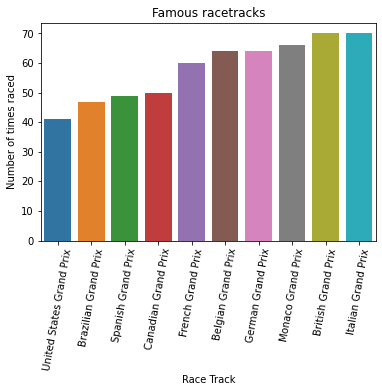

In [5]:
counts = df['raceName'].value_counts()
top_10 = counts.head(10)
top_10 = top_10.sort_values()
df_top_10 = df[df['raceName'].isin(top_10.index)]
sns.countplot(x='raceName', data=df_top_10, order=top_10.index)
plt.xticks(rotation=80)
plt.xlabel('Race Track')
plt.ylabel('Number of times raced')
plt.title('Famous racetracks')

Text(0.5, 1.0, 'Champions with most wins in the Monaco Grand Prix')

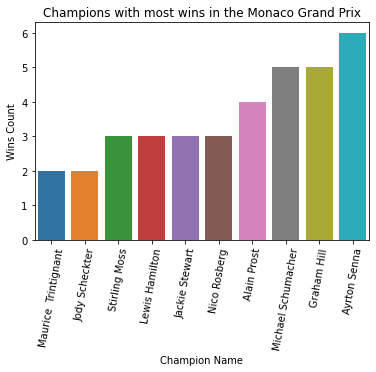

In [6]:
df_monaco = df[df['raceName'] == 'Monaco Grand Prix']
df_monaco_grouped = df_monaco.groupby('champion_name')['champion_name'].count().reset_index(name='count')
df_monaco_grouped = df_monaco_grouped.sort_values('count', ascending=True).tail(10)
sns.barplot(x='champion_name', y='count', data=df_monaco_grouped)
plt.xticks(rotation=80)
plt.xlabel('Champion Name')
plt.ylabel('Wins Count')
plt.title('Champions with most wins in the Monaco Grand Prix')


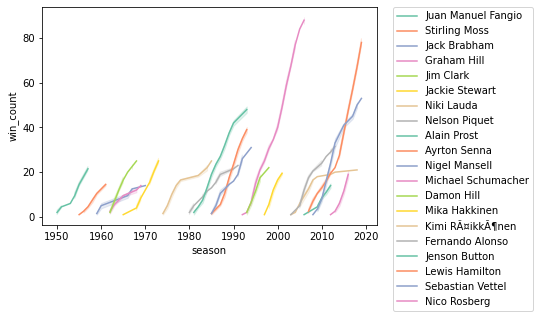

In [7]:
top_20_winners = df.groupby("champion_name")["win_count"].sum().sort_values(ascending=False).head(20)
df_top_20 = df[df['champion_name'].isin(top_20_winners.index)]
sns.lineplot(data=df_top_20, x="season", y="win_count", hue="champion_name",legend="full",palette='Set2');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [8]:

df = get_win_streak(df)
df.sample(1)

,season,round,url,raceName,Circuit,date,champion_name,time,win_count,win_streak
114,1963,4,http://en.wikipedia.org/wiki/1963_French_Grand...,French Grand Prix,"{'circuitId': 'reims', 'url': 'http://en.wikip...",1963-06-30,Jim Clark,NaN,6,3


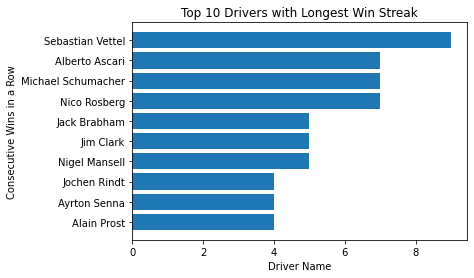

In [9]:
top_10 = df.nlargest(30, 'win_streak')
plt.barh(top_10['champion_name'], top_10['win_streak'])
plt.xlabel('Driver Name')
plt.ylabel('Consecutive Wins in a Row')
plt.title('Top 10 Drivers with Longest Win Streak')
plt.gca().invert_yaxis()
plt.show()

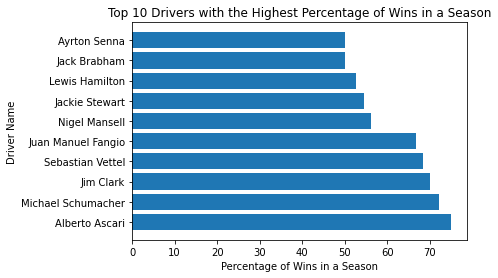

In [10]:
driver_wins = df.groupby(['season', 'champion_name']).size().reset_index(name='Wins')

total_races = df.groupby(['season']).size().reset_index(name='Total Races')
driver_wins = driver_wins.merge(total_races, on='season')
driver_wins['Percentage'] = 100 * driver_wins['Wins'] / driver_wins['Total Races']

top_10 = driver_wins.nlargest(23, 'Percentage')

plt.barh(top_10['champion_name'], top_10['Percentage'])
plt.xlabel('Percentage of Wins in a Season')
plt.ylabel('Driver Name')
plt.title('Top 10 Drivers with the Highest Percentage of Wins in a Season')
plt.show()
